In [244]:
from pathlib import Path
from typing import Literal

import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np

In [245]:
# The ranges for the different types of features used by EMBER
# Inclusive lower bound, exclusive upper bound
bounds = {
    "histogram" : (0, 256),
    "byteentropy" : (256, 512),
    "strings" : (512, 616),
    "general" : (616, 626),
    "header" : (626, 688),
    "section" : (688, 944),
    "imports" : (944, 2224),
    "exports" : (2224, 2352),
    "datadirectories" : (2352, 2382)
}

In [246]:
def analyze_features_for_model(model_file:Path):
    booster = lgb.Booster(model_file=model_file)
    lgb.plot_importance(booster, max_num_features=10)
    plt.show()
    plt.clf()
    for importance_type in ("split", "gain"):
        importance = get_sorted_feature_importance_by_type(booster, importance_type)
        histogram_of_ith_most_important_feature_type(
            importance,
            f"ith most important feature type: {importance_type}"
        )
        histogram_of_cumulative_importance_feature_type(
            importance,
            f"cumulative important feature type: {importance_type}"
        )

def get_sorted_feature_importance_by_type(
        model:lgb.Booster,
        importance_type:Literal["split", "gain"]
):
    ft_importance = model.feature_importance(importance_type)
    srt_ft_importance = np.flip(np.argsort(ft_importance))
    srt_ft_importance_by_type = {
        f : np.where((l <= srt_ft_importance) & (srt_ft_importance < u))[0]
        for f, (l, u) in bounds.items()
    }
    return srt_ft_importance_by_type

def histogram_of_ith_most_important_feature_type(
        srt_ft_importance_by_type:dict[str, np.ndarray],
        title:str
):
    plt.hist(
        x=[i for i in srt_ft_importance_by_type.values()],
        label=[i for i in srt_ft_importance_by_type.keys()],
        histtype='bar',
        bins=10,
    )
    plt.title(title)
    plt.xlabel("ith Most Important Feature")
    plt.ylabel("Count")
    plt.legend()
    plt.show()

def histogram_of_cumulative_importance_feature_type(
        srt_ft_importance_by_type:dict[str, np.ndarray],
        title:str
):
    cum_ft_importance_by_type = {
        f : v.sum() for f, v in srt_ft_importance_by_type.items()
    }
    total = sum(s for s in cum_ft_importance_by_type.values())
    cum_ft_importance_by_type["histogram & byteentropy"] = (
        cum_ft_importance_by_type["histogram"] + cum_ft_importance_by_type["byteentropy"]
    )
    container = plt.bar(
        list(cum_ft_importance_by_type.keys()),
        np.array(list(cum_ft_importance_by_type.values())) / total * 100,
    )
    plt.bar_label(container, color='navy', fmt="%.2f")
    plt.title(title)
    plt.xticks(rotation=60)
    plt.xlabel("Feature Type")
    plt.ylabel("Percent Classifier's Reliance")
    plt.show()

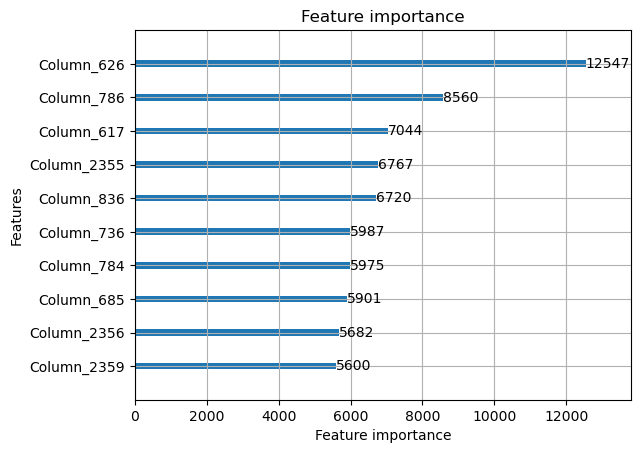

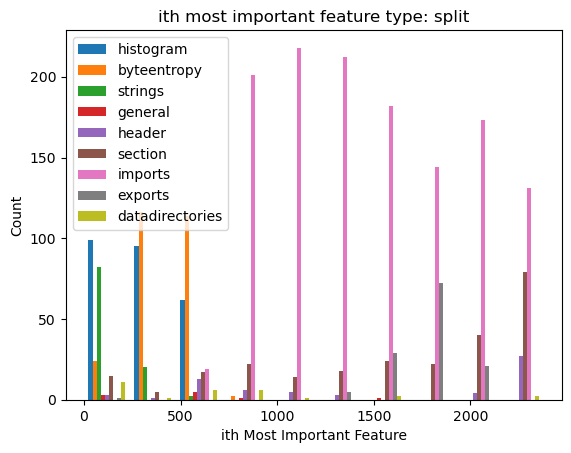

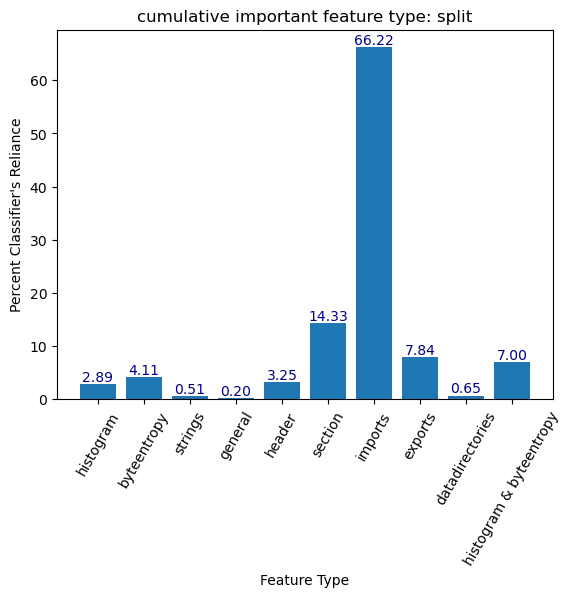

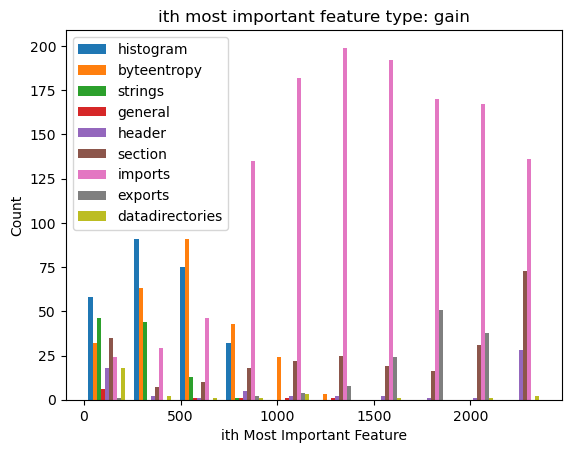

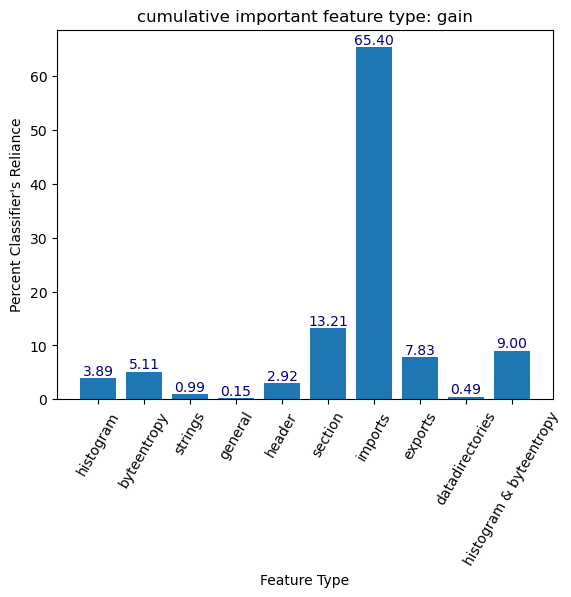

In [247]:
analyze_features_for_model(Path("/home/lk3591/Documents/models/ember.model"))

### Sorel Model 0

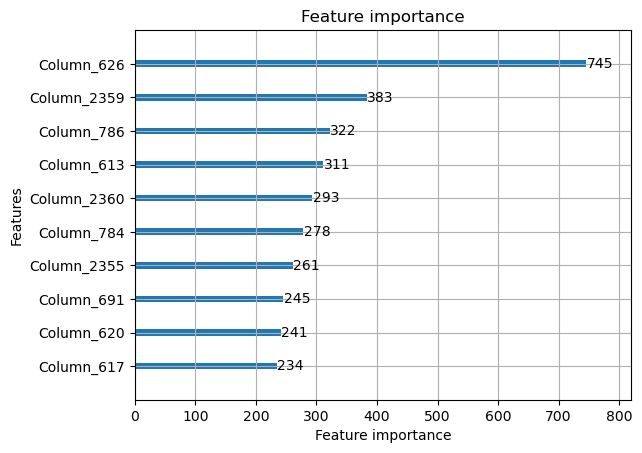

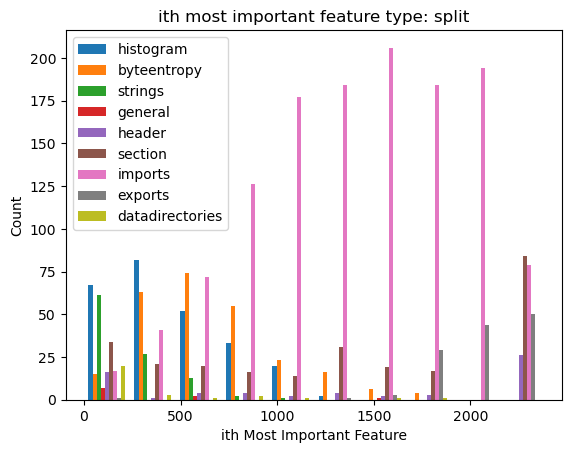

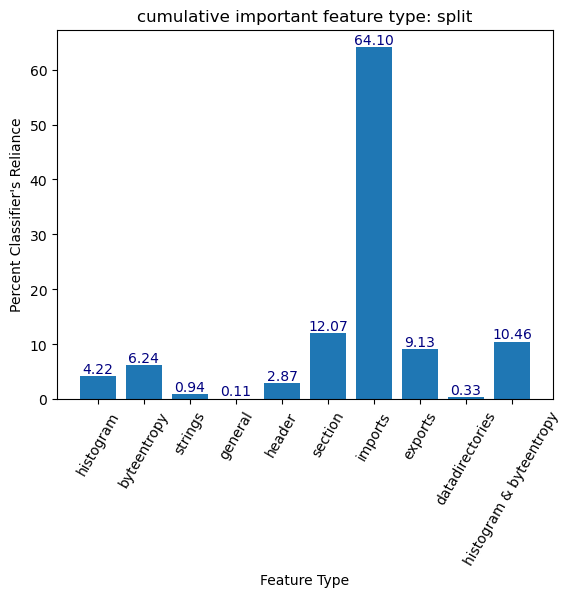

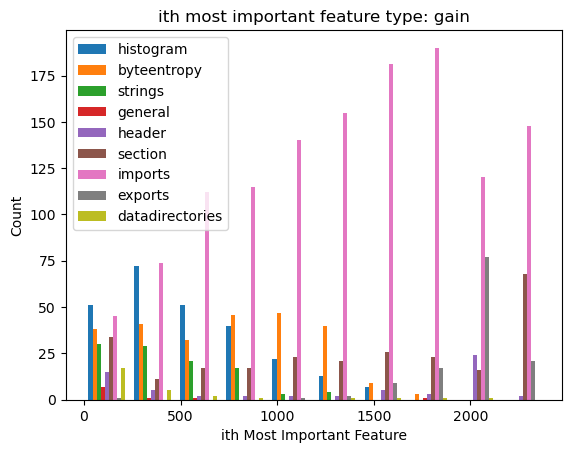

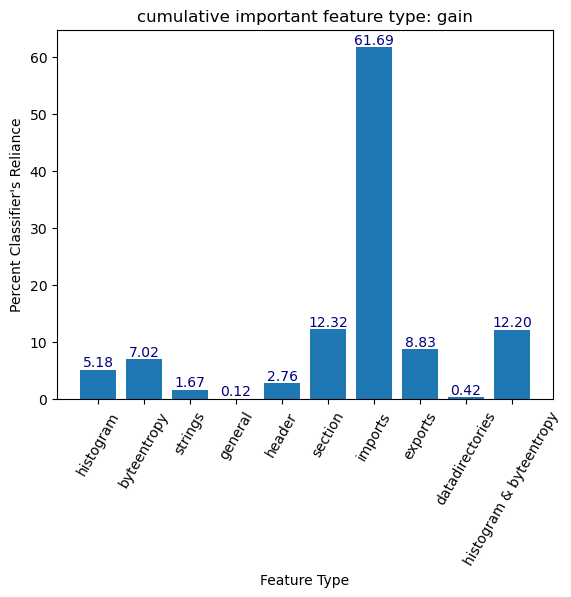

In [248]:
analyze_features_for_model(Path("/home/lk3591/Documents/models/sorelLightGBM0.model"))

### SOREL Model 1

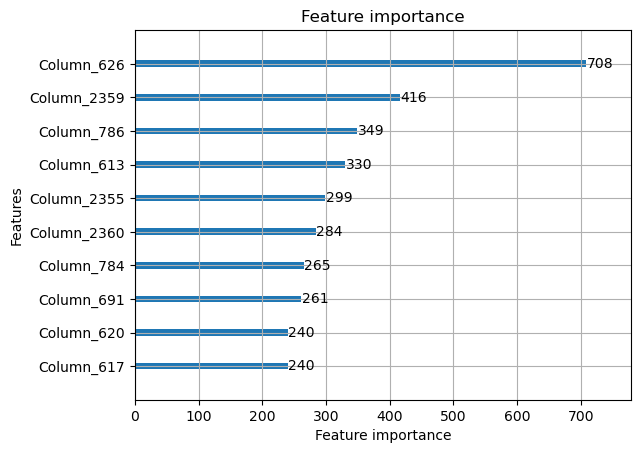

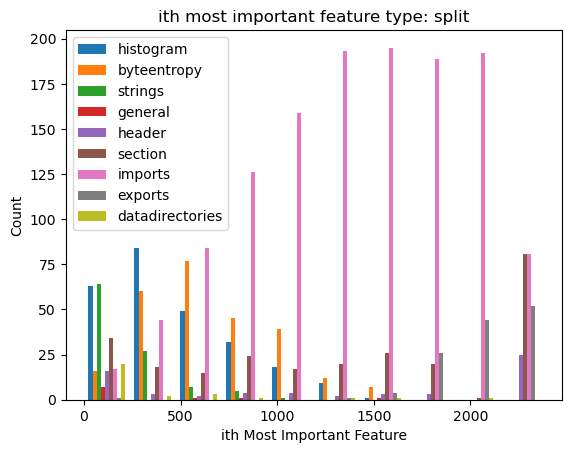

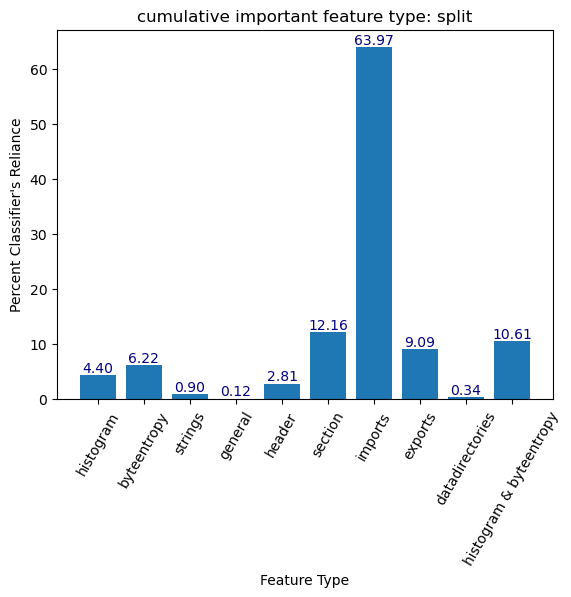

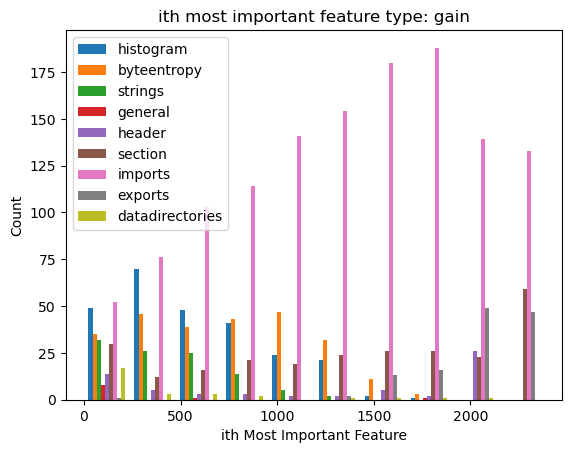

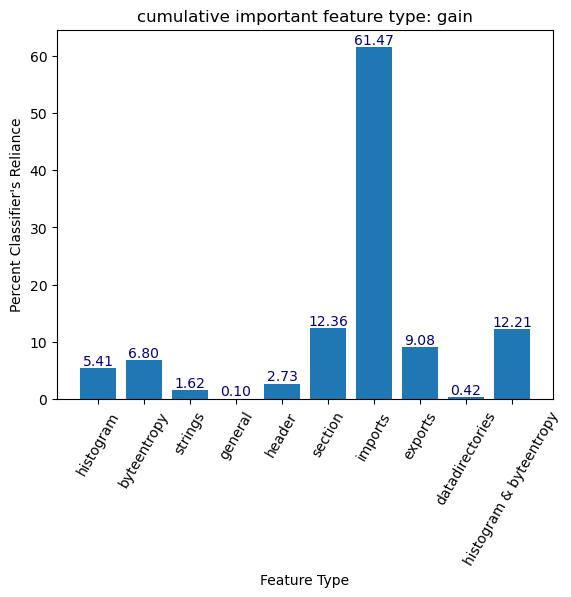

In [249]:
analyze_features_for_model(Path("/home/lk3591/Documents/models/sorelLightGBM1.model"))

### SOREL Model 2

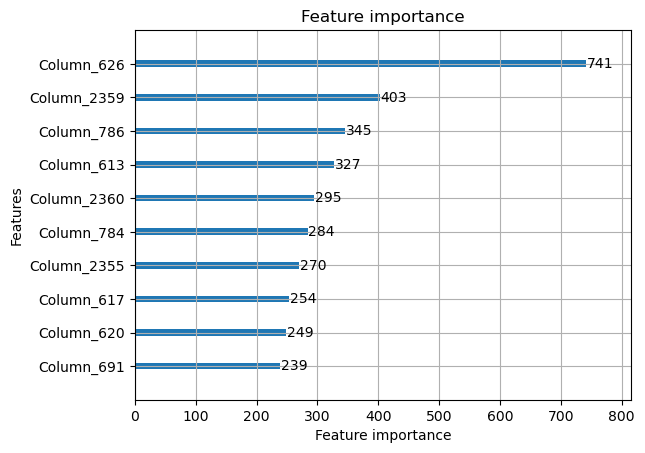

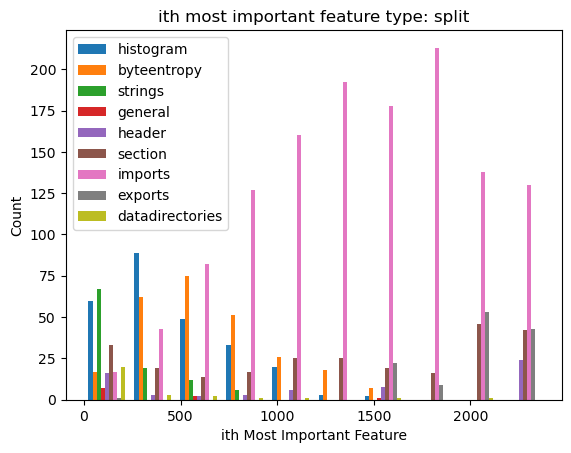

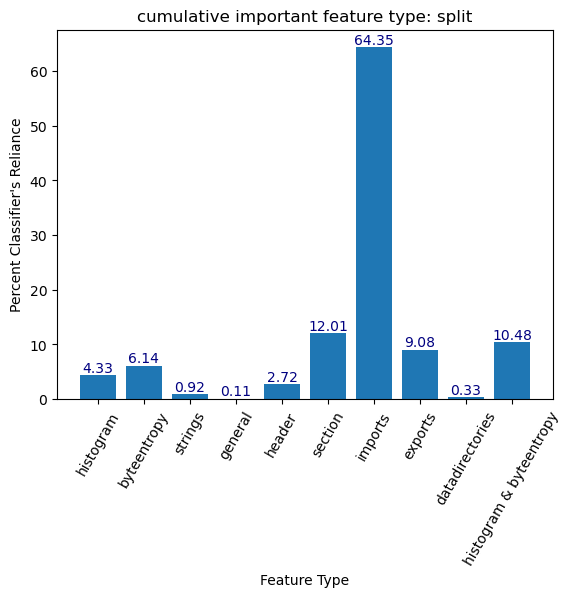

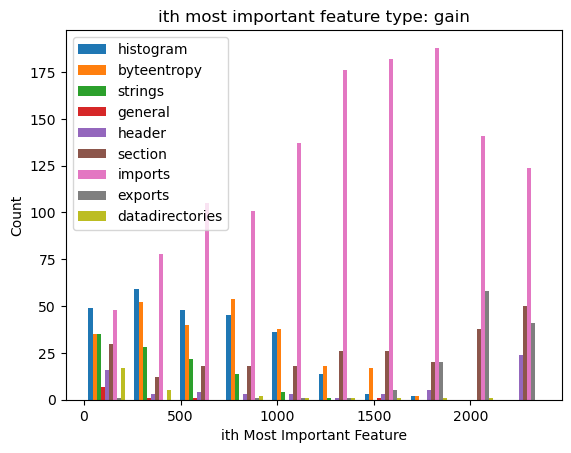

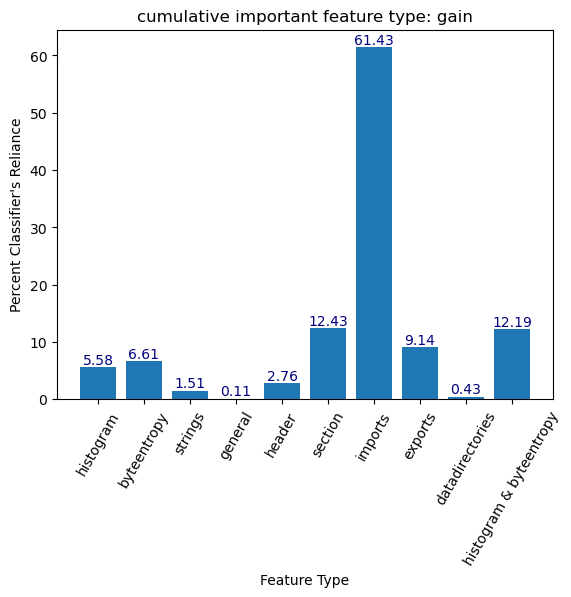

In [250]:
analyze_features_for_model(Path("/home/lk3591/Documents/models/sorelLightGBM2.model"))

### SOREL Model 3

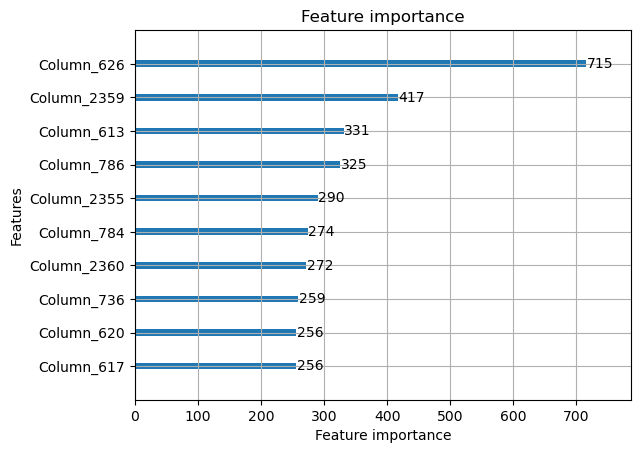

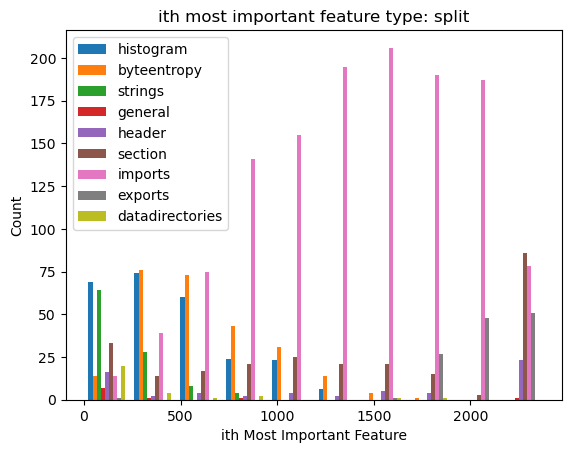

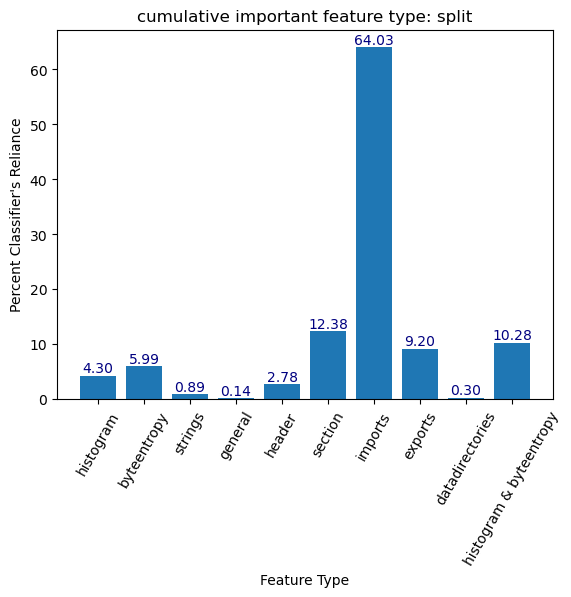

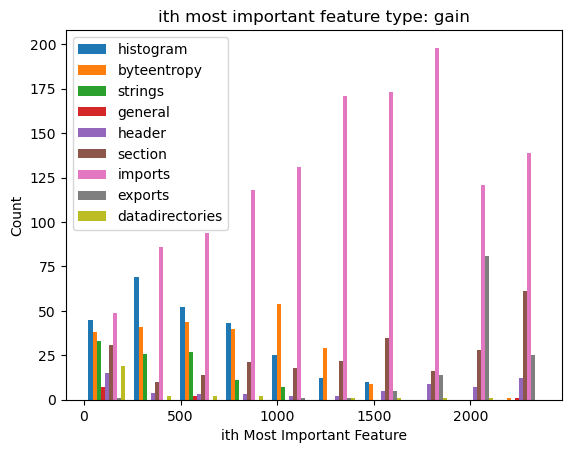

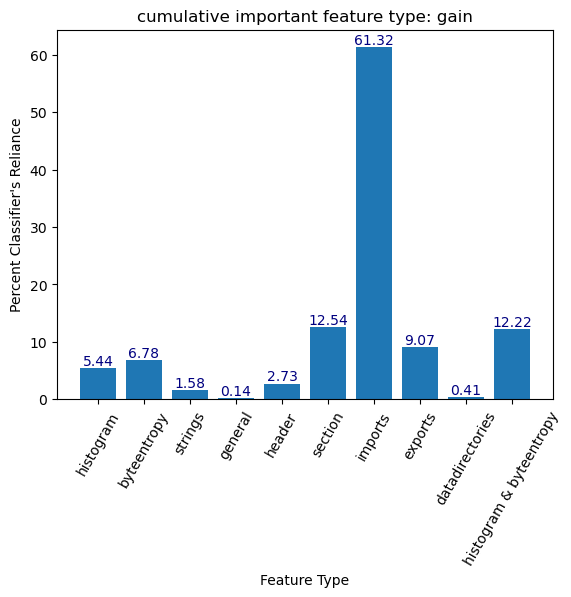

In [251]:
analyze_features_for_model(Path("/home/lk3591/Documents/models/sorelLightGBM3.model"))

### SOREL Model 4

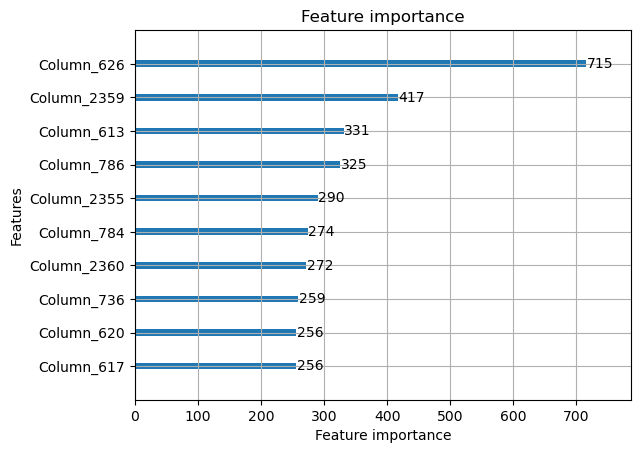

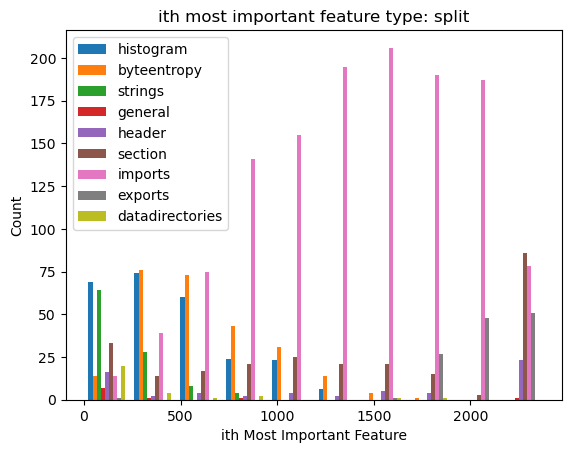

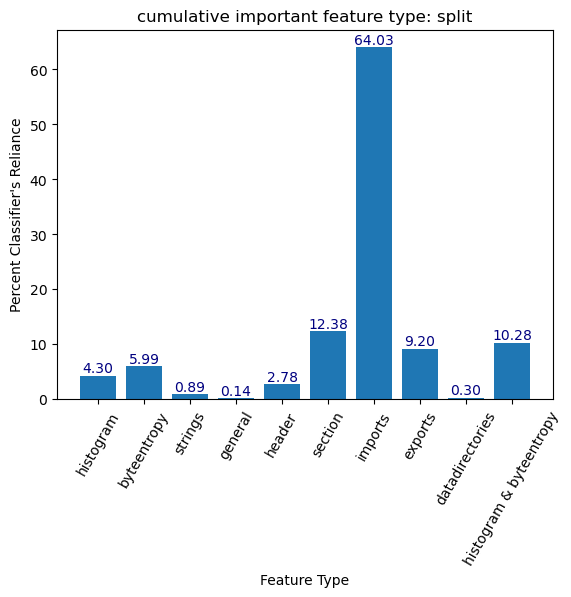

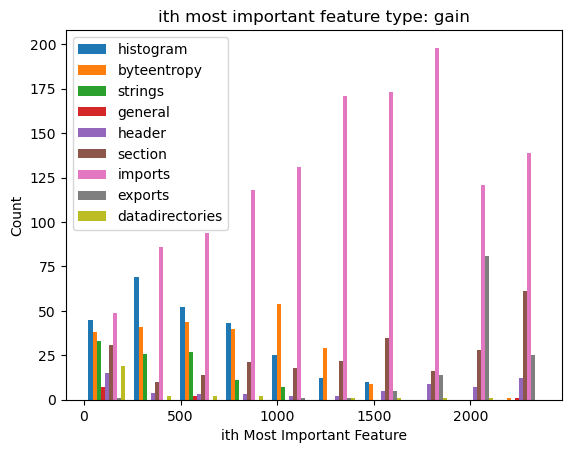

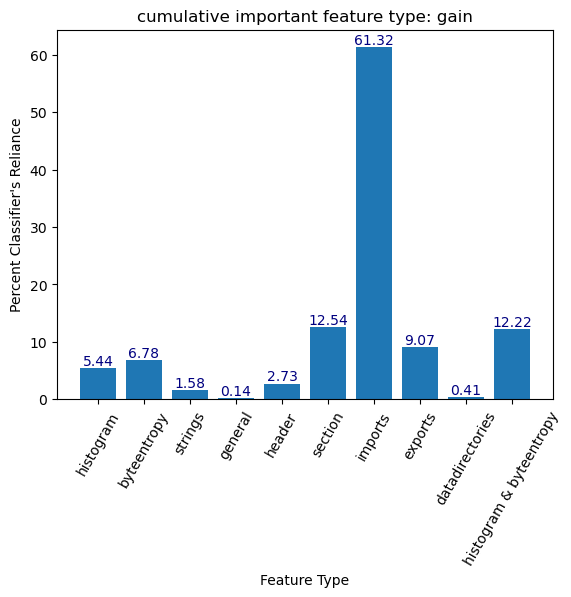

In [252]:
analyze_features_for_model(Path("/home/lk3591/Documents/models/sorelLightGBM4.model"))